<a href="https://colab.research.google.com/github/aalr007/VisionComputacional/blob/main/SuperpixelesEquipo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Visión computacional para imágenes y video*** </center>
## <center> ***Proyecto Final Equipo 6*** </center>
## <center> ***SuperPixeles*** </center>
### Profesor: Gilberto Ochoa Ruiz
### Alumnos:
* Alberto Nieves Cisneros            A01793829
* Aurelio Antonio Lozano Rábago      A01081266
* Héctor Manuel González Villareal   A00178679
* Jessica Lechuga Ramos              A01793512
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> TBD de Marzo del 2023 </p>

In [12]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse


In [13]:
# load the image and convert it to a floating point data type
image = img_as_float(io.imread("sample_data/image.jpg"))


<ipython-input-14-74072a1e837a>:5: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = numSegments, sigma = 5)


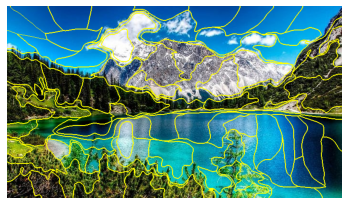

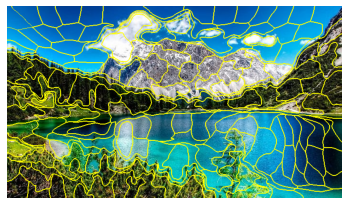

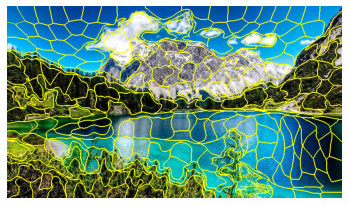

In [14]:
# loop over the number of segments
for numSegments in (100, 200, 300):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")
# show the plots
plt.show()

#now using Opencv

In [24]:
import cv2
from cv2 import ximgproc
from google.colab.patches import cv2_imshow
import numpy as np

Linear Spectral Clustering

In [46]:
img = cv2.imread("sample_data/image.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [47]:
print(img.shape)

(400, 700, 3)


In [55]:
region_size = 50  #con esto se calcula el numero de superpixeles: tamaño de la imagen / (region size^2) --> en este caso la imagen es de 700*400/(25*25) = 448 superpixeles
ratio = .5  #con este parametro se ajusta la forma del superpixel, a mas pequeño, mas se ajustara a la forma adecuada (tipo sobre entrenamiento), radio de 1, los pixeles se ven muy cuadrados

In [56]:
iLSC = cv2.ximgproc.createSuperpixelLSC(img, region_size, ratio)
iLSC.iterate(10)


color_img = np.zeros((img.shape[0], img.shape[1],3), np.uint8)
color_img[:] = (0, 0, 255)


mask_slsc = iLSC.getLabelContourMask() #Get Mask, superpixel edge Mask==1
label_slsc = iLSC.getLabels() #Get superpixel labels
number_slsc = iLSC.getNumberOfSuperpixels() #Get the number of superpixels
mask_inv_slsc = cv2. bitwise_not(mask_slsc) 
img_slsc = cv2.bitwise_and(img,img,mask = mask_inv_slsc) #Draw superpixel boundaries on the original image
img2 = cv2.bitwise_and(color_img, color_img, mask=mask_slsc) 
resultslsc = cv2.add(img_slsc, img2)

In [57]:
print("labels", label_slsc)
print("Number of pixels", number_slsc)


labels [[  0   0   0 ... 104 104 104]
 [  0   0   0 ... 104 104 104]
 [  0   0   0 ... 104 104 104]
 ...
 [  7   7   7 ... 111 111 111]
 [  7   7   7 ... 111 111 111]
 [  7   7   7 ... 111 111 111]]
Number of pixels 112


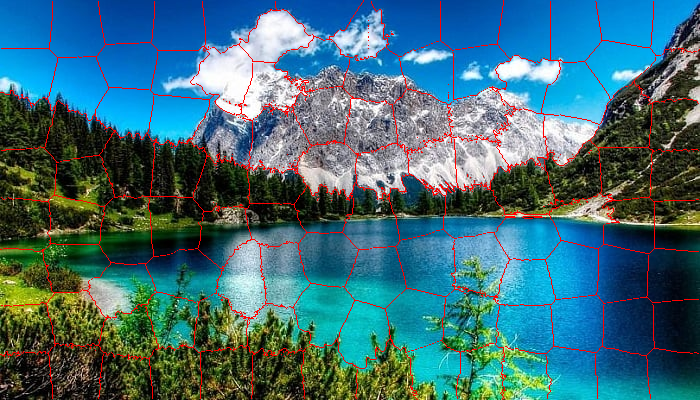

In [58]:
cv2_imshow(resultslsc)
#cv2_imshow(img)

Superpixels Extracted via Energy-Driven Sampling

In [40]:
iSeeds = cv2.ximgproc.createSuperpixelSEEDS(	img.shape[1], img.shape[0], img.shape[2], number_slsc, 15,3,10,False)
iSeeds.iterate(img,10)


color_img = np.zeros((img.shape[0], img.shape[1],3), np.uint8)
color_img[:] = (0, 0, 255)

mask_seeds = iSeeds.getLabelContourMask() #Get Mask, superpixel edge Mask==1
label_seeds = iSeeds.getLabels() #Get superpixel labels
number_seeds = iSeeds.getNumberOfSuperpixels() #Get the number of superpixels
mask_inv_seeds = cv2. bitwise_not(mask_seeds) 
img_seeds = cv2.bitwise_and(img,img,mask = mask_inv_seeds) #Draw superpixel boundaries on the original image    
img2 = cv2.bitwise_and(color_img, color_img, mask=mask_seeds) 
resultseeds = cv2.add(img_seeds, img2)

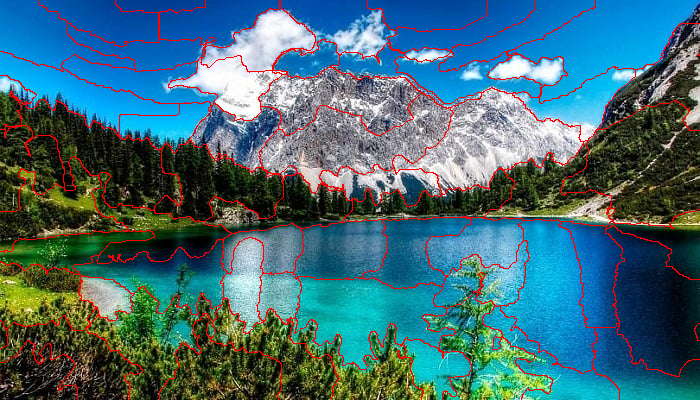

In [41]:
cv2_imshow(resultseeds)

Simple Linear Iterative Clustering

In [98]:
islic = cv2.ximgproc.createSuperpixelSLIC(img,	algorithm = cv2.ximgproc.SLIC,region_size=60,ruler=100)
islic.iterate(10) #Number of iterations, the bigger the better the effect

color_img = np.zeros((img.shape[0], img.shape[1],3), np.uint8)
color_img[:] = (0, 0, 255)

mask_slic = islic.getLabelContourMask() #Get Mask, superpixel edge Mask==1
label_slic = islic.getLabels() #Get superpixel labels
number_slic = islic.getNumberOfSuperpixels() #Get the number of superpixels
mask_inv_slic = cv2. bitwise_not(mask_slic)  
img_slic = cv2.bitwise_and(img,img,mask = mask_inv_slic) #Draw superpixel boundaries on the original image

img2 = cv2.bitwise_and(color_img, color_img, mask=mask_slic) 
resultslic = cv2.add(img_slic, img2)

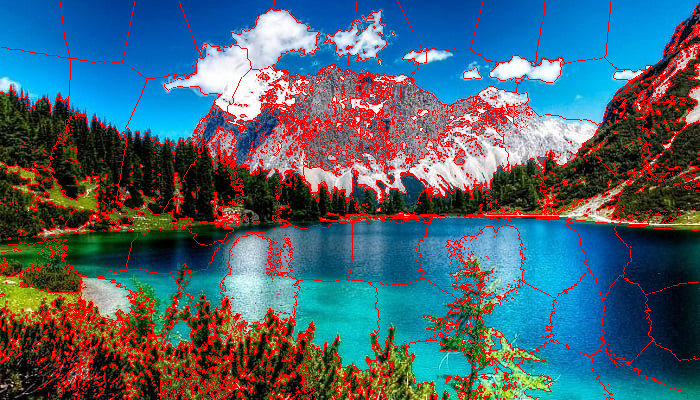

In [99]:
cv2_imshow(resultslic)

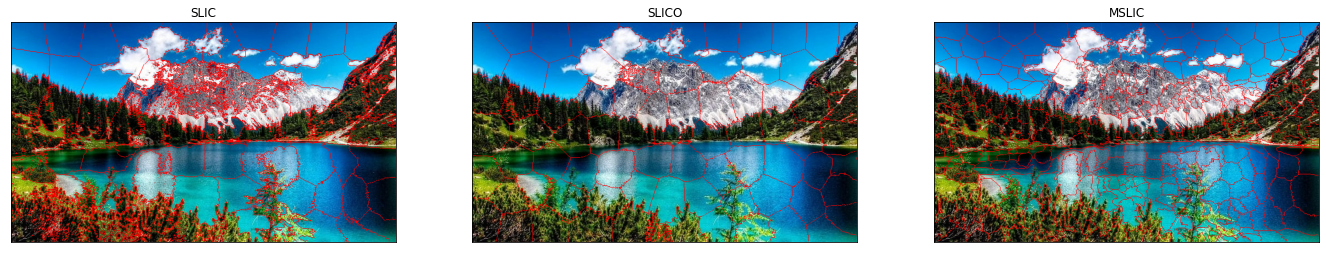

In [100]:
titles = ['SLIC', 'SLICO','MSLIC']
SlicAlgorthm=[cv2.ximgproc.SLIC,cv2.ximgproc.SLICO,cv2.ximgproc.MSLIC]
SlicImages=[]


color_img = np.zeros((img.shape[0], img.shape[1],3), np.uint8)
color_img[:] = (0, 0, 255)

i=0
for i in range(3):
  islic = cv2.ximgproc.createSuperpixelSLIC(img,	algorithm = SlicAlgorthm[i],region_size=60,ruler=100.0)
  islic.iterate(10) #Number of iterations, the bigger the better the effect
  mask_slic = islic.getLabelContourMask() #Get Mask, superpixel edge Mask==1
  label_slic = islic.getLabels() #Get superpixel labels
  number_slic = islic.getNumberOfSuperpixels() #Get the number of superpixels
  mask_inv_slic = cv2. bitwise_not(mask_slic)  
  img_slic = cv2.bitwise_and(img,img,mask = mask_inv_slic) #Draw superpixel boundaries on the original image
  img2 = cv2.bitwise_and(color_img, color_img, mask=mask_slic) 
  resultslic = cv2.add(img_slic, img2)


  SlicImages.append(resultslic)


#original plot size was too small, following code is to have a bigger image
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(30)
i=0

for i in range(3):
    SlicImages[i] = cv2.cvtColor(SlicImages[i], cv2.COLOR_BGR2RGB)    
    plt.subplot(2,5,i+1),plt.imshow(SlicImages[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

##Bibliografia
* OpenCV Documentation: https://docs.opencv.org/3.4/df/d6c/group__ximgproc__superpixel.html
*  Adrian Rosebrock,Segmentation: A SLIC Superpixel Tutorial using Python. July 28, 2014  https://pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/
* DiTect  Python - Opencv implements image superpixel segmentation (SLIC, SEEDS, LSC) https://www.zditect.com/code/python--opencv-implements-image-superpixel-segmentation-slic-seeds-lsc.html